In [2]:
import spacy
import pandas as pd

In [3]:
nlp = spacy.load('en_core_web_sm')

In [6]:
emma_ja = "emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of authority being now long passed away they had been living together as friend and friend very mutually attached and emma doing just what she liked highly esteeming miss taylors judgment but directed chiefly by her own"

In [7]:
emma_ja

'emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of aut

In [42]:
spacy_doc = nlp(emma_ja)

In [10]:
pos_df = pd.DataFrame(columns=['token','pos_tag'])

In [29]:
rows = []

for token in spacy_doc:
    rows.append({
        'token': token.text,
        'pos_tag': token.pos_
    })

pos_df = pd.DataFrame(rows)
print(pos_df)

         token pos_tag
0         emma   PROPN
1    woodhouse   PROPN
2     handsome     ADJ
3       clever     ADJ
4          and   CCONJ
..         ...     ...
209   directed    VERB
210    chiefly     ADV
211         by     ADP
212        her    PRON
213        own     ADJ

[214 rows x 2 columns]


In [31]:
pos_df.head(15)

,token,pos_tag
0,emma,PROPN
1,woodhouse,PROPN
2,handsome,ADJ
3,clever,ADJ
4,and,CCONJ
5,rich,ADJ
6,with,ADP
7,a,DET
8,comfortable,ADJ
9,home,NOUN


In [39]:
pos_df_poscounts = pos_df.groupby(['pos_tag'])['token'].count().sort_values(ascending=False)

<Axes: xlabel='pos_tag'>

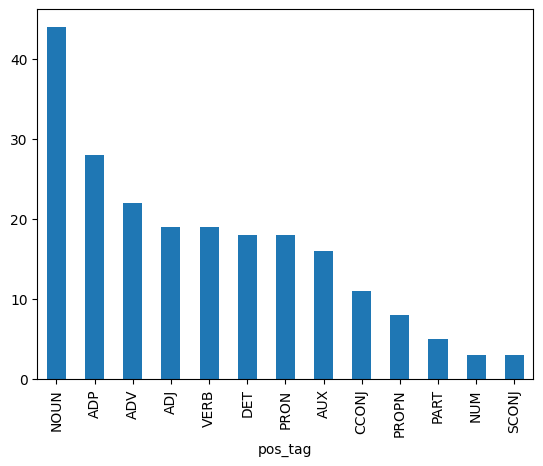

In [38]:
pos_df['pos_tag'].value_counts().plot(kind='bar')

In [41]:
pos_df_poscounts.head(10)

pos_tag
NOUN     44
ADP      28
ADV      22
ADJ      19
VERB     19
DET      18
PRON     18
AUX      16
CCONJ    11
PROPN     8
Name: token, dtype: int64

In [43]:
nouns = pos_df[pos_df.pos_tag == 'NOUN'][:10]

In [44]:
nouns

,token,pos_tag
9,home,NOUN
12,disposition,NOUN
20,blessings,NOUN
22,existence,NOUN
28,years,NOUN
31,world,NOUN
36,distress,NOUN
38,vex,NOUN
47,daughters,NOUN
53,father,NOUN
